# Visualisations for Star Wars: The Last Jedi

Here I'll be generating some plots to display on my post for Star Wars: The Last Jedi

In [7]:
import re
import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go

import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
imdb_data = pd.read_csv("../data/imdb_data.csv")
rt_data_1 = pd.read_csv("../rotten_tomatoes/reviews.csv")
rt_data_2 = pd.read_csv("../rotten_tomatoes/reviews.csv")

rt_data = pd.concat([rt_data_1, rt_data_2]).drop_duplicates()

imdb_data['star_rating'] = imdb_data.star_rating / 2
imdb_data['source'] = 'imdb'
rt_data['source'] = 'rotten tomatoes'

data_cols = ['date', 'name', 'user_link', 'source', 'review', 'downvotes', 'upvotes', 'star_rating']
review_data = pd.concat([imdb_data, rt_data])[data_cols]

In [3]:
review_data.tail()

,date,name,user_link,source,review,downvotes,upvotes,star_rating
838,"December 24, 2017",David B,NaN,rotten tomatoes,What a let down it was. How anticlimactic with...,NaN,NaN,1.0
839,"December 24, 2017",,NaN,rotten tomatoes,"Not the best star wars flick, but I was still ...",NaN,NaN,4.0
840,"December 24, 2017",Josh H,NaN,rotten tomatoes,"Bad movie, bad star wars movie... this movie g...",NaN,NaN,1.0
841,"December 24, 2017",Atlas B,NaN,rotten tomatoes,Worst star wars movie in the series. Star Wars...,NaN,NaN,0.5
842,"December 24, 2017",,NaN,rotten tomatoes,The original Star Wars movies were made for ad...,NaN,NaN,2.0


In [4]:
bootstrap_means_rt = [review_data[review_data.source == 'rotten tomatoes'].star_rating.sample(100).mean() for i in range(1000)]
bootstrap_means_imdb = [review_data[review_data.source == 'imdb'].star_rating.sample(100).mean() for i in range(1000)]

In [5]:
bootstrap_means = pd.DataFrame(list(zip(bootstrap_means_rt, bootstrap_means_imdb)), columns = ['rotten_tomatoes', 'imdb'])

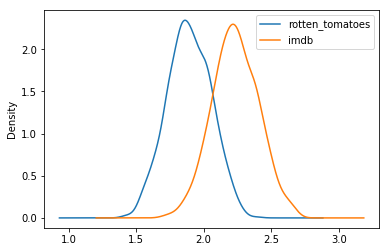

In [8]:
bootstrap_means.plot(kind = 'density')

In [9]:
import colorlover as cl

In [13]:
source = 'rotten tomatoes'
trace = go.Histogram(x=review_data[review_data.source == source].star_rating, 
                     marker = dict(color = cl.scales['11']['div']['RdYlGn'][::-1]))
text_trace = go.Scatter(
    x=[review_data.star_rating[review_data.source == source].mean() + 0.3],
    y=[review_data[review_data.source == source].star_rating.value_counts().max()],
    text=['Average: %.2f' % review_data.star_rating[review_data.source == source].mean()],
    mode='text',
)
layout = go.Layout(
    title='Star Ratings for Star Wars: The Last Jedi (%s)' % source,
    xaxis=dict(title='Star Rating'),
    yaxis=dict(title='Frequency'),
    bargap=0,
    bargroupgap=0,
    showlegend=False,
    shapes=[dict({
            'type': 'line',
            'x0': review_data[review_data.source == source].star_rating.mean(),
            'y0': 0,
            'x1': review_data[review_data.source == source].star_rating.mean(),
            'y1': review_data[review_data.source == source].star_rating.value_counts().max(),
            'line': {
                'color': '#000000',
                'width': 5,
                'dash': 'dot'
            }})]
)

data = [trace, text_trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='rt_star_ratings', config = dict(displayModeBar = False))

In [15]:
from colour import Color

In [16]:
def num2rgb(x, y, z):
    return 'rgb(%d,%d,%d)' %(int(x * 256), int(y * 256), int(z * 256))
bl2gd = [num2rgb(*c.get_rgb()) for c in Color("Grey").range_to("Gold", 11)]
bl2gd

['rgb(128,128,128)',
 'rgb(141,117,115)',
 'rgb(153,111,102)',
 'rgb(166,109,90)',
 'rgb(179,111,77)',
 'rgb(192,118,64)',
 'rgb(204,129,51)',
 'rgb(217,144,38)',
 'rgb(230,163,25)',
 'rgb(243,187,12)',
 'rgb(256,215,0)']

In [17]:
source = 'imdb'
trace = go.Histogram(x=review_data[review_data.source == source].star_rating,
                    marker = dict(color = bl2gd))
text_trace = go.Scatter(
    x=[review_data.star_rating[review_data.source == source].mean() + 0.3],
    y=[review_data[review_data.source == source].star_rating.value_counts().max()],
    text=['Average: %.2f' % review_data.star_rating[review_data.source == source].mean()],
    mode='text',
)
layout = go.Layout(
    title='Star Ratings for Star Wars: The Last Jedi (%s)' % source,
    xaxis=dict(title='Star Rating'),
    yaxis=dict(title='Frequency'),
    bargap=0,
    bargroupgap=0,
    showlegend=False,
    shapes=[dict({
            'type': 'line',
            'x0': review_data[review_data.source == source].star_rating.mean(),
            'y0': 0,
            'x1': review_data[review_data.source == source].star_rating.mean(),
            'y1': review_data[review_data.source == source].star_rating.value_counts().max(),
            'line': {
                'color': '#000000',
                'width': 5,
                'dash': 'dot'
            }})]
)

data = [trace, text_trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='imdb_star_ratings', config = dict(displayModeBar = False))

In [18]:
[m for m in dir(cl) if not m.startswith("_")]

['colorsys',
 'defaultdict',
 'flipper',
 'interp',
 'math',
 'scale_type',
 'scales',
 'to_hsl',
 'to_html',
 'to_numeric',
 'to_rgb']

In [19]:
dict(displayModeBar = False)

{'displayModeBar': False}

In [21]:
review_data.star_rating.mean()

2.1814331501831501

In [134]:
review_data

,date,name,user_link,source,review,downvotes,upvotes,star_rating
0,10 December 2017,Michael Anietie Asuquo,http://www.imdb.com/user/ur63609896/?ref_=tt_urv,imdb,"For film fanatics like myself, The Last Jedi i...",194.0,138.0,4.0
1,10 December 2017,smg242,http://www.imdb.com/user/ur46304483/?ref_=tt_urv,imdb,"First of all, let me alleviate the concern tha...",170.0,105.0,5.0
2,10 December 2017,kashidomar,http://www.imdb.com/user/ur65211374/?ref_=tt_urv,imdb,From all aspect this is by far the most attrac...,218.0,119.0,5.0
3,11 December 2017,Nick Gargas (dirty_chords),http://www.imdb.com/user/ur44721165/?ref_=tt_urv,imdb,I attended an advanced press screening of the ...,142.0,93.0,4.0
4,12 December 2017,OneEightNine Media,http://www.imdb.com/user/ur52600820/?ref_=tt_urv,imdb,I am giving this movie 7.4 out of 10 stars but...,88.0,53.0,2.5
5,12 December 2017,www.ramascreen.com,http://www.imdb.com/user/ur12230254/?ref_=tt_urv,imdb,This review is spoiler-free meaning it does no...,94.0,49.0,5.0
6,12 December 2017,shawneofthedead,http://www.imdb.com/user/ur48490287/?ref_=tt_urv,imdb,"The middle film in a trilogy is, almost always...",82.0,39.0,4.0
7,13 December 2017,frankvdh-75554,http://www.imdb.com/user/ur77180182/?ref_=tt_urv,imdb,SPOILER ALERT!!!\r\nJust came back from seeing...,114.0,180.0,3.0
8,13 December 2017,orkunust,http://www.imdb.com/user/ur83234294/?ref_=tt_urv,imdb,"The film was beyond being a disappointment , i...",55.0,94.0,2.0
9,13 December 2017,realyogsototh,http://www.imdb.com/user/ur27537490/?ref_=tt_urv,imdb,I just watched the movie about 3 hours ago and...,130.0,193.0,1.5


In [23]:
name_data = pd.read_csv("../data/unique_names_reviewed.csv")

In [24]:
review_data['first_name'] = review_data.name.apply(lambda s: re.split("\s|\-|_", s.strip().lower(), maxsplit = 1)[0])

In [25]:
review_data = review_data.merge(name_data, how='left', on = 'first_name')

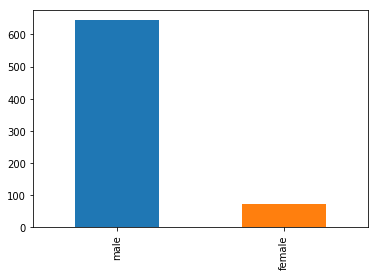

In [28]:
review_data.loc[review_data.sex != "both", 'sex'].value_counts().plot(kind = 'bar')

In [48]:
help(review_data.sex.value_counts)

Help on method value_counts in module pandas.core.base:

value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True) method of pandas.core.series.Series instance
    Returns object containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : boolean, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : boolean, default True
        Sort by values
    ascending : boolean, default False
        Sort in ascending order
    bins : integer, optional
        Rather than count values, group them into half-open bins,
        a convenience for pd.cut, only works with numeric data
    dropna : boolean, default True
        Don't include counts of NaN.
    
    Returns
    -------
    counts : Series



In [51]:
review_data.loc[:, 'sex'].value_counts(dropna = False, sort = False)

NaN       3546
both       104
female      74
male       644
Name: sex, dtype: int64

In [56]:
labels = ["can't model", "can't tell", 'female', 'male']
values = review_data.loc[:, 'sex'].value_counts(dropna = False, sort = False)
trace = go.Pie(labels = labels, values = values, marker = {'colors': ['Red', 'Blue', 'Purple', 'Grey']},
               textfont = dict(color = 'White'))
py.iplot([trace], filename = 'sex_pie_chart')

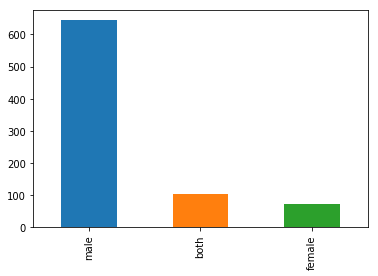

In [43]:
review_data.sex.value_counts().plot(kind = 'bar')

In [44]:
review_data.groupby('source')['sex'].value_counts().sum()

822

sex
both      AxesSubplot(0.125,0.125;0.775x0.755)
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: star_rating, dtype: object

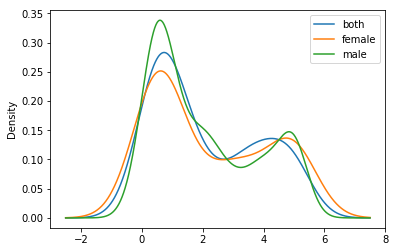

In [199]:
review_data.groupby('sex')['star_rating'].plot(kind = 'density', legend = True)

In [213]:
sex_means = review_data.groupby('sex')['star_rating'].apply(lambda x: [x.sample(100, replace = True).mean() for i in range(100)])

sex_means = pd.DataFrame(list(zip(sex_means['both'], sex_means['female'], sex_means['male'])), columns = ['both', 'female', 'male'])

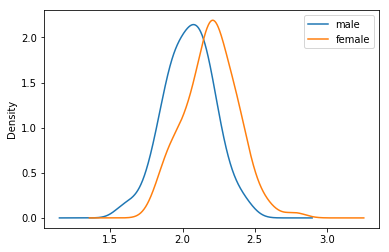

In [216]:
sex_means[['male', 'female']].plot(kind = 'density')

In [249]:
import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np

# Group data together
hist_data = [sex_means['male'], sex_means['female']]

group_labels = ['Male', 'Female']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.07, colors = ['Blue', 'Red'])
fig['layout'].update(title="Average Star Rating by Gender")

# Plot!
py.iplot(fig, filename='Average Star Rating by Gender')

In [246]:
sex = 'male'
trace = go.Histogram(x=review_data[review_data.sex == sex].star_rating,
                    marker = dict(color = bl2gd),
                    xbins=dict(
                    start=0.0,
                    end=5.0,
                    size=0.5
                ))
text_trace = go.Scatter(
    x=[review_data.star_rating[review_data.sex == sex].mean() + 0.3],
    y=[review_data[review_data.sex == sex].star_rating.value_counts().max()],
    text=['Average: %.2f' % review_data[review_data.sex == sex].star_rating.mean()],
    mode='text',
)
layout = go.Layout(
    title='Star Ratings for Star Wars: The Last Jedi (%s)' % sex,
    xaxis=dict(title='Star Rating'),
    yaxis=dict(title='Frequency'),
    bargap=0,
    bargroupgap=0,
    showlegend=False,
    shapes=[dict({
            'type': 'line',
            'x0': review_data[review_data.sex == sex].star_rating.mean(),
            'y0': 0,
            'x1': review_data[review_data.sex == sex].star_rating.mean(),
            'y1': review_data[review_data.sex == sex].star_rating.value_counts().max(),
            'line': {
                'color': '#000000',
                'width': 5,
                'dash': 'dot'
            }})]
)

data = [trace, text_trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='imdb_star_ratings', config = dict(displayModeBar = False))

In [245]:
sex = 'female'
trace = go.Histogram(x=review_data[review_data.sex == sex].star_rating,
                    marker = dict(color = bl2gd),
                    xbins=dict(
                    start=0.0,
                    end=5.0,
                    size=0.5
                ))
text_trace = go.Scatter(
    x=[review_data.star_rating[review_data.sex == sex].mean() + 0.3],
    y=[review_data[review_data.sex == sex].star_rating.value_counts().max()],
    text=['Average: %.2f' % review_data[review_data.sex == sex].star_rating.mean()],
    mode='text',
)
layout = go.Layout(
    title='Star Ratings for Star Wars: The Last Jedi (%s)' % sex,
    xaxis=dict(title='Star Rating'),
    yaxis=dict(title='Frequency'),
    bargap=0,
    bargroupgap=0,
    showlegend=False,
    shapes=[dict({
            'type': 'line',
            'x0': review_data[review_data.sex == sex].star_rating.mean(),
            'y0': 0,
            'x1': review_data[review_data.sex == sex].star_rating.mean(),
            'y1': review_data[review_data.sex == sex].star_rating.value_counts().max(),
            'line': {
                'color': '#000000',
                'width': 5,
                'dash': 'dot'
            }})]
)

data = [trace, text_trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='imdb_star_ratings', config = dict(displayModeBar = False))